# Laplace Equation

As a fellow second-year Physics student I'm currently attending the undergraduate course on Classical Electromagnetism. One of the key equation of the Electrostatic is surely the Laplace/Poisson equation:
$$
\nabla^2 V = 0
$$

which summarize the first and the third Maxwell equation into a beatiful relation (but this only holds in a void region of space). Solving the Laplace is not always so simple, but the existence is always guaranted. But what about the uniqueness of the solution? The theory regarding this particular type of equations says that, by fixing the boundary counditions on $\partial \Omega$, we have an unique solution in the domain $\Omega$.

We want to solve it using Python, but we need to think a way to solve it. The simplest one is surely obtained by "finite-difference" method that I'll going to explain here: now let's suppose to be in 3-dimensional space, the Laplace equation is equivalent to
$$
\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2} = 0
$$
by creating a grid $N \times N$ in our domain $\Omega$ where we are trying to solve the equation, we can approx our equation as
$$
\frac{V_{i+1, j, k} - 2V_{i, j, k} + V_{i-1, j, k}}{(\Delta x)^2} + \frac{V_{i, j+1, k} - 2V_{i, j, k} + V_{i, j-1, k}}{(\Delta y)^2} + \frac{V_{i, j, k+1} - 2V_{i, j, k} + V_{i, j, k-1}}{(\Delta z)^2} = 0
$$
by assuming that $\Delta x = \Delta y = \Delta z$ we can solve for $V_{i, j, k}$
$$
\boxed{V_{i,j,k} = \frac{1}{6} \left(V_{i+1, j, k} + V_{i-1, j, k} + V_{i, j+1, k} + V_{i, j-1, k} + V_{i, j, k+1} + V_{i, j, k-1} \right)}
$$
and this is a propriety that our solution have. Our hope is to set $V_{i, j, k} \stackrel{N \to +\infty}{\to} \frac{1}{6} \left(V_{i+1, j, k} + V_{i-1, j, k} + V_{i, j+1, k} + V_{i, j-1, k} + V_{i, j, k+1} + V_{i, j, k-1} \right)$ to get the solution and we can mathematically prove that the process actually converges to the actual solution.

As example of a physical situation, we might want to solve the Laplace equation inside a box where $\frac{\partial V}{\partial \hat{n}} = 0$ where $\hat{n}$ is the normal vector to the surface of a really large box (we can imagine it as $+\infty$) and naturally two rectangular conductor: one with a potential equal $V_0$ and the other is a grounded conductor.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
N = 100
grid = np.zeros((N, N, N)) + 0.5 # Domain
grid[30:70, 30:70, 20] = 1 # the first component of the grid is y, the second is y and the third is x
grid[30:70, 30:70, 80] = 0 # the same
mask_pos = grid==1
mask_neg = grid==0
yv, xv, zv = np.meshgrid(np.arange(N),np.arange(N),np.arange(N))
grid = 1-zv/100 # possible guess for our potential (at least when we are really close to the conductor with V_0)

Now we notice that our computation can be expressed using a convolution matrix in the form of:

In [91]:
kern = generate_binary_structure(3, 1).astype(float)/6
kern[1, 1, 1] = 0

For Neumann's boundary condition ($\frac{\partial V}{\partial \hat{n}} = 0$) we have approx the derivative as the difference between che $x=0$ slice and the $x=1$ slice (and the same for the other border of the box)

In [93]:
def neumann(a):
    a[0,:,:] = a[1, :, :] = a[-1, :, :] = a[2, :, :]
    a[:, 0, :] = a[:, 1, :] = a[:, -1, :] = a[:, -2, :]
    a[:, :, 0] = a[:, :, 1] = a[:, :, -1] = a[:, :, -2]
    return a

Now we want to iter the procedure to calculate the potential everywhere

In [95]:
err = []
iters = 2000
for i in range(iters):
    grid_updated = convolve(grid,kern, mode='constant')
    # Boundary conditions (neumann)
    grid_updated = neumann(grid_updated)
    # Boundary conditions (dirchlett)
    grid_updated[mask_pos] = 1
    grid_updated[mask_neg] = 0
    # See what error is between consecutive arrays
    err.append(np.mean((grid-grid_updated)**2))
    grid = grid_updated

The function convolve just use the $3D$ convolution often used in image to calculate the values of the potential in the center of a cube of potential. Let's now see the potential at a given slice

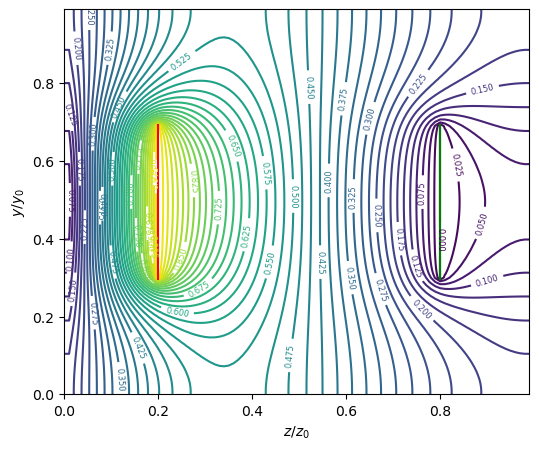

In [96]:
slc = 40
plt.figure(figsize=(6,5))
CS = plt.contour(np.arange(100)/100, np.arange(100)/100, grid[slc], levels=40)
plt.clabel(CS, CS.levels, inline=True, fontsize=6)
plt.xlabel('$z/z_0$')
plt.ylabel('$y/y_0$')
plt.axvline(0.2, ymin=0.3, ymax=0.7, color='r')
plt.axvline(0.8, ymin=0.3, ymax=0.7, color='g')
plt.show()

It might be even interesting calculating the error between two consecutive arrays:

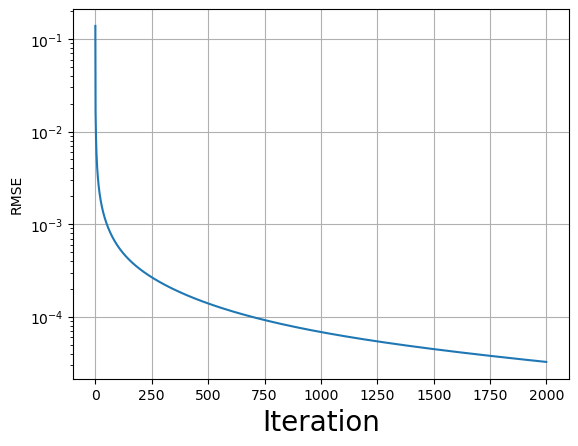

In [105]:
plt.semilogy(np.sqrt(np.array(err)))
plt.xlabel('Iteration', fontsize=20)
plt.ylabel(r'RMSE')
plt.grid()